In [1]:
# Single wheel and damper assembly

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

from toolbox.bodies import *

In [2]:
# Main body parameters
sc_mass = 200 # kg
sc_I = np.array([[350.0, 0, 0], [0, 300.0, 0], [0, 0, 400.0]]) # kg m^2



sc_Sp = np.array([[0],[0],[0]]) # Static moment of main body

sc = Craft(sc_mass, sc_I)

In [3]:
# Wheel parameters
wheel_mass = 20 # kg
wheel_radius = 1 # m
wheel_distance = np.array([[0], [0], [0]]) # m distance from the center of mass of the main body

wheel_Is = wheel_mass * wheel_radius**2 / 2 # kg m^2
wheel_It = wheel_mass * wheel_radius**2 / 4 # kg m^2

Jww_B = np.array([[wheel_Is, 0, 0], [0, wheel_It, 0], [0, 0, wheel_It]]) # kg m^2 # Inertia tensor of the wheel in body frame
# state variables are om_s, om_s_dot = control input

w_axis = np.array([[1], [0], [0]]) # axis of rotation of the wheel
w_Sp = wheel_mass*wheel_distance # Static moment of the wheel
wheel_locked = False


wh = Wheel(wheel_mass, wheel_distance, w_axis, wheel_radius)
wh.locked = True


In [4]:
# Damper parameters
md = 1 # kg
Kd = 1 # Kg/s^2
Cd = 5 # Kg/s
b = np.array([[0], [0], [2]]) # m distance from the center of mass of the main body
d_axis = np.array([[1], [0],[ 0]]) # damper axis

# State variables are chi, chi_dot
d_Sp = md*b # Static moment of damper, assuming chi0 = 0

d = Damper(md, b, d_axis, Kd, Cd)




In [5]:
# External forces
Fext = np.array([[0],[ 0], [0]]) # N
Mext = np.array([[0], [0], [0]]) # Nm

In [6]:
# # Set up the simulation
t0 = 0
tf = 3600 # s
sc.add_devices([wh, d])

nu0 = np.array([0, 0, 0, 0.2*np.pi, 0.05, 0.05, 0, 0.95*np.pi]) # [vP, om, chi_dot, om_s]
nu0_aug = np.hstack((nu0, 0)) # Augment nu0 with chi


In [7]:
sc.initialize(np.array([0]))

In [8]:
sc.simulate(nu0_aug, (t0, tf))

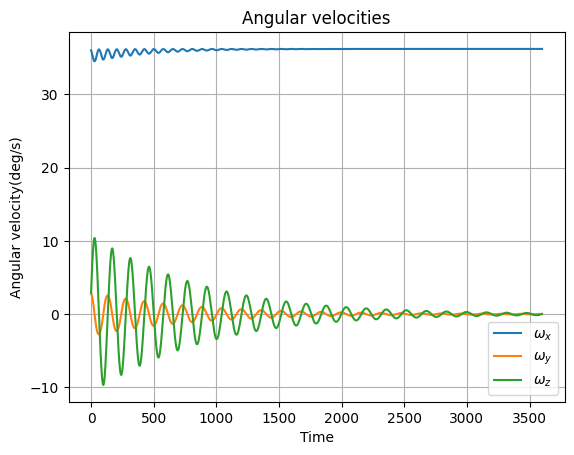

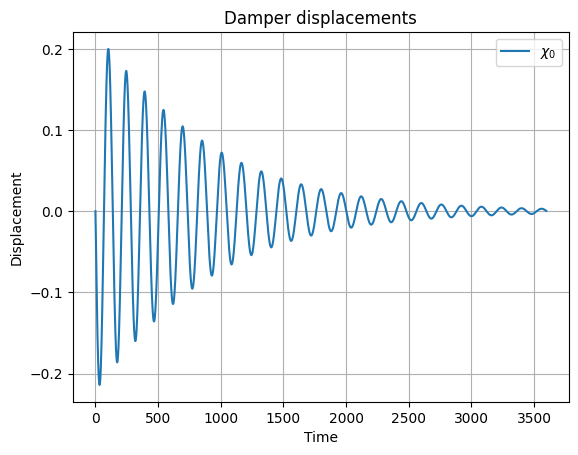

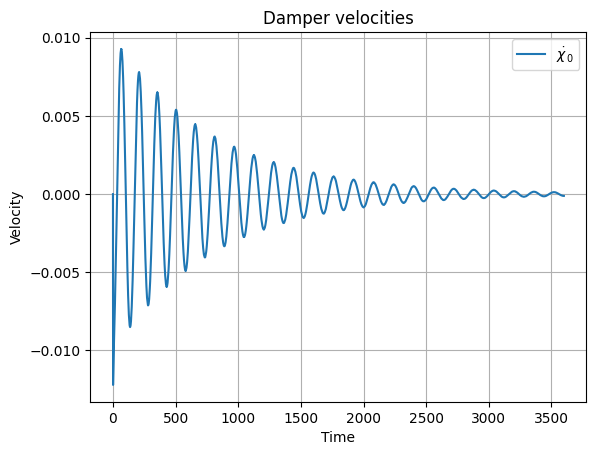

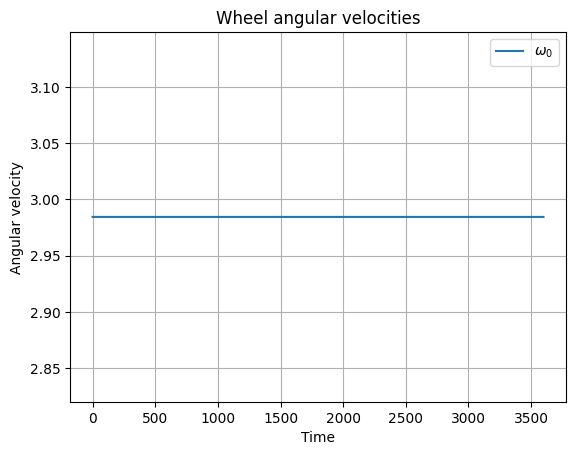

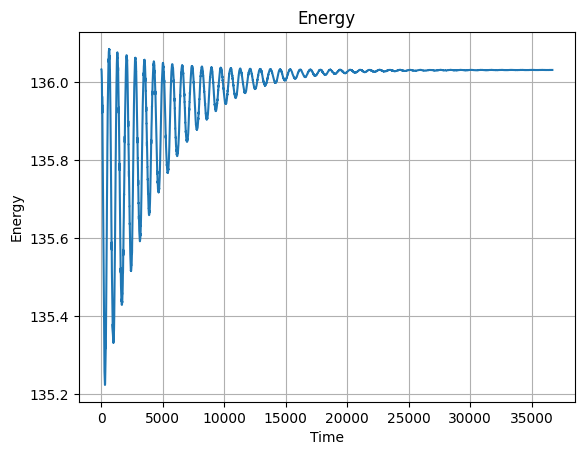

In [9]:
sc.plot()